Wine Quality Prediction

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt


In [4]:
df=pd.read_csv('/content/gdrive/MyDrive/winequalityN.csv')

In [9]:
#df = pd.read_csv(R'D://xdatasets/winequalityN.csv')
print(df.head())
print(df.info())


    type  fixed acidity  volatile acidity  ...  sulphates  alcohol  quality
0  white            7.0              0.27  ...       0.45      8.8        6
1  white            6.3              0.30  ...       0.49      9.5        6
2  white            8.1              0.28  ...       0.44     10.1        6
3  white            7.2              0.23  ...       0.40      9.9        6
4  white            7.2              0.23  ...       0.40      9.9        6

[5 rows x 13 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   f

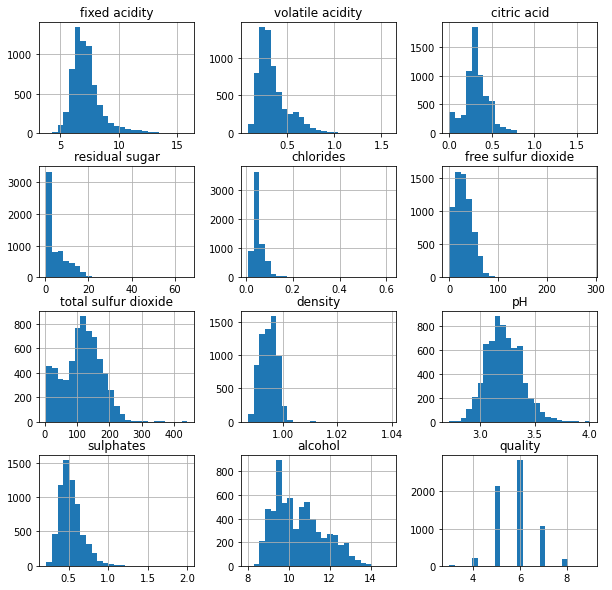

In [10]:
df.hist(bins=25,figsize=(10,10))
plt.show()

Text(0, 0.5, 'alcohol')

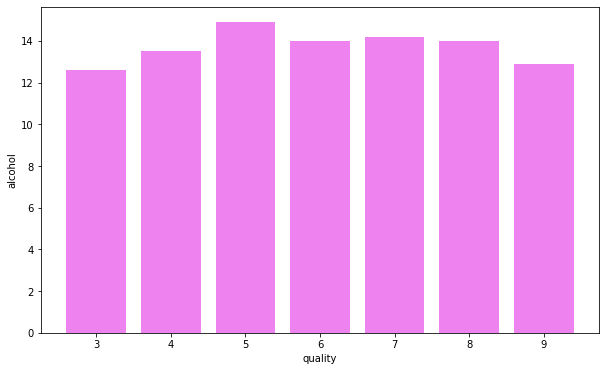

In [11]:
plt.figure(figsize=[10,6])

plt.bar(df['quality'],df['alcohol'],color='violet')

plt.xlabel('quality')

plt.ylabel('alcohol')

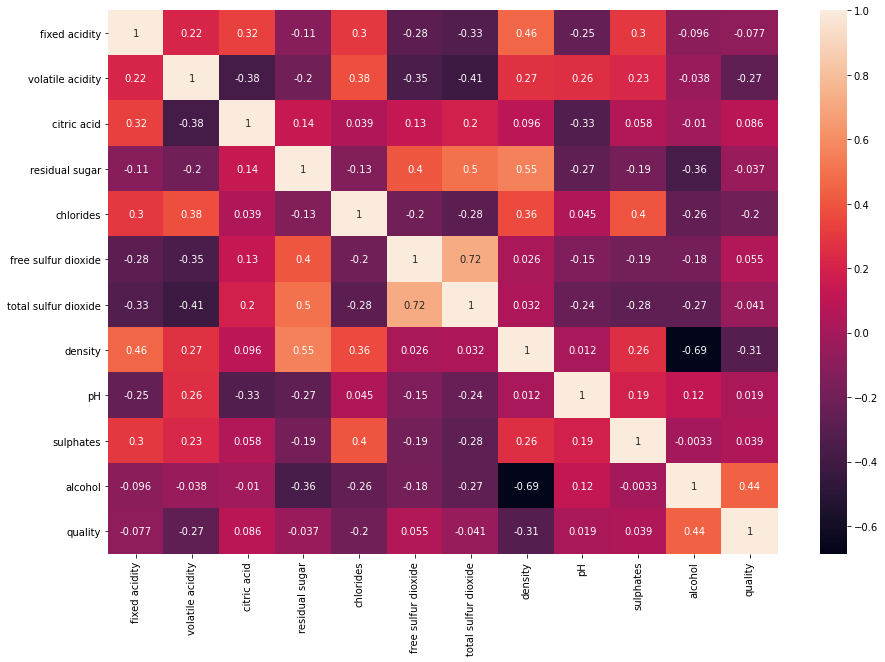

In [12]:
# ploting heatmap
plt.figure(figsize=[15,10],facecolor='white')
sb.heatmap(df.corr(),annot=True)

In [13]:
for a in range(len(df.corr().columns)):
    for b in range(a):
        if abs(df.corr().iloc[a,b]) >0.7:
            name = df.corr().columns[a]
            print(name)

total sulfur dioxide


 we found that ” total sulfur dioxide ” having a correlation greater than 0.7 values so we qill drop this column.

In [14]:
new_df=df.drop('total sulfur dioxide',axis=1)

In [15]:
new_df.isnull().sum()

type                    0
fixed acidity          10
volatile acidity        8
citric acid             3
residual sugar          2
chlorides               2
free sulfur dioxide     0
density                 0
pH                      9
sulphates               4
alcohol                 0
quality                 0
dtype: int64

In [16]:
new_df.update(new_df.fillna(new_df.mean()))

In [17]:
next_df = pd.get_dummies(new_df,drop_first=True)

next_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality,type_white
0,7.0,0.270,0.36,20.7,0.045,45.0,1.00100,3.00,0.450000,8.8,6,1
1,6.3,0.300,0.34,1.6,0.049,14.0,0.99400,3.30,0.490000,9.5,6,1
2,8.1,0.280,0.40,6.9,0.050,30.0,0.99510,3.26,0.440000,10.1,6,1
3,7.2,0.230,0.32,8.5,0.058,47.0,0.99560,3.19,0.400000,9.9,6,1
4,7.2,0.230,0.32,8.5,0.058,47.0,0.99560,3.19,0.400000,9.9,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,0.99490,3.45,0.580000,10.5,5,0
6493,5.9,0.550,0.10,2.2,0.062,39.0,0.99512,3.52,0.531215,11.2,6,0
6494,6.3,0.510,0.13,2.3,0.076,29.0,0.99574,3.42,0.750000,11.0,6,0
6495,5.9,0.645,0.12,2.0,0.075,32.0,0.99547,3.57,0.710000,10.2,5,0


In [18]:
next_df['best quality'] = [ 1 if x>=7 else 0 for x in df.quality] 
print(next_df)

      fixed acidity  volatile acidity  ...  type_white  best quality
0               7.0             0.270  ...           1             0
1               6.3             0.300  ...           1             0
2               8.1             0.280  ...           1             0
3               7.2             0.230  ...           1             0
4               7.2             0.230  ...           1             0
...             ...               ...  ...         ...           ...
6492            6.2             0.600  ...           0             0
6493            5.9             0.550  ...           0             0
6494            6.3             0.510  ...           0             0
6495            5.9             0.645  ...           0             0
6496            6.0             0.310  ...           0             0

[6497 rows x 13 columns]


In [19]:
from sklearn.model_selection import train_test_split
  

x = next_df.drop(['quality','best quality'],axis=1)
y = next_df['best quality']
  

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=40)

In [20]:
from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler()
norm_fit = norm.fit(x_train)
scal_xtrain = norm_fit.transform(x_train)
scal_xtest = norm_fit.transform(x_test)
print(scal_xtrain)

[[0.34710744 0.1        0.22289157 ... 0.14044944 0.26086957 1.        ]
 [0.20661157 0.18       0.15662651 ... 0.15168539 0.11594203 1.        ]
 [0.24793388 0.06666667 0.18072289 ... 0.16853933 0.14492754 1.        ]
 ...
 [0.33884298 0.38666667 0.         ... 0.20224719 0.2173913  0.        ]
 [0.24793388 0.34       0.06024096 ... 0.25280899 0.24637681 0.        ]
 [0.19008264 0.16666667 0.19277108 ... 0.24157303 0.2173913  1.        ]]


In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error

rnd = RandomForestClassifier()

fit_rnd = rnd.fit(x_train,y_train)

rnd_score = rnd.score(x_test,y_test)
print('score of model is : ',rnd_score)

y_test_predict = rnd.predict(x_test)
rnd_MSE = mean_squared_error(y_test,y_test_predict)

rnd_RMSE = np.sqrt(rnd_MSE)

print('root mean squared error is : ',rnd_RMSE)
print(classification_report(y_test_predict,y_test))


score of model is :  0.87
root mean squared error is :  0.36055512754639896
              precision    recall  f1-score   support

           0       0.97      0.88      0.92      1126
           1       0.51      0.79      0.62       174

    accuracy                           0.87      1300
   macro avg       0.74      0.84      0.77      1300
weighted avg       0.90      0.87      0.88      1300



In [22]:
x_predict = list(rnd.predict(x_test))
df = {'predicted':x_predict,'orignal':y_test}
pd.DataFrame(df).head(40)

,predicted,orignal
369,0,0
6243,0,0
3374,0,0
1009,0,0
220,0,0
4019,0,0
871,0,0
3710,0,0
3781,0,0
1248,0,1


Here 1 represents the quality greater than 0.7 which is considered good quality wine and 0 represents the quality below 0.7 which is not considered as a good quality wine. 